In [1]:
import hsup as _
import gymnasium as gym
from gymnasium import Env
from stable_baselines3 import PPO, DDPG
import torch
import numpy as np
import pandas as pd

from dataset.data import data
from dataset.simulation import model_indoor, model_sec_back_t
import matplotlib.pyplot as plt
from itertools import count
from IPython.display import display
from copy import deepcopy


plt.style.use('dark_background')

TOTAL_TIMESTEPS = 10
LOG_INTERVAL = 100
MODEL = DDPG

def test(env: Env, model: MODEL):
    state, _ = env.reset()
    rewards = []
    history = []
    while True:
        action, _ = model.predict(state)
        state, reward, done, trunc, _ = env.step(action)
        history.append(state)
        rewards.append(reward)
        if done:
            print("done")
            break
        if trunc:
            print("trunc")
            break
    
    history = pd.DataFrame(history, columns=env.observation_cols)
    history[['indoor_60min', 'outdoor_60min', 'sec_supp_t_60min', 'sec_back_t_60min']].plot(figsize=(15, 5), grid=True)
    return rewards


In [23]:
env = gym.make(
    "hsup/HeatSupply-v0",
    # max_episode_steps=100,

    data=data,
    model_indoor=model_indoor,
    model_sec_back_t=model_sec_back_t,
    discretize=False,
)

done
63


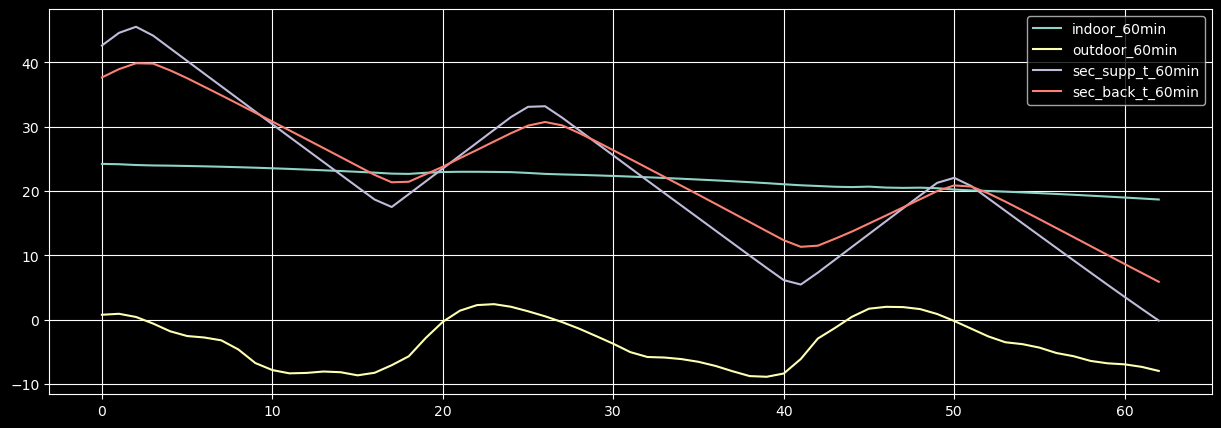

In [26]:
model = MODEL.load(f"checkpoints/{MODEL.__name__}-{TOTAL_TIMESTEPS}")
rewards = test(env, model)
print(len(rewards))

trunc


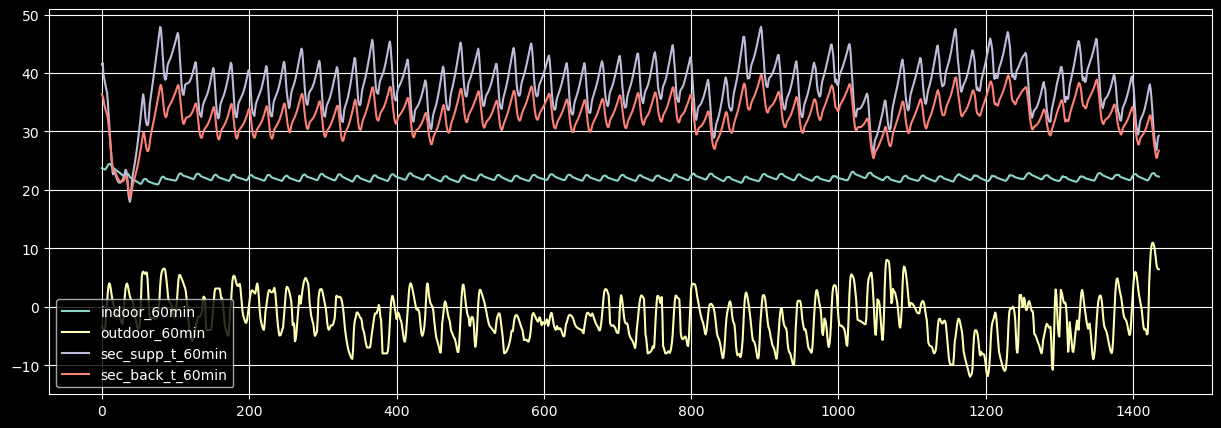

In [32]:
from models.agent import PIDAgent, ZeroAgent

model = PIDAgent(0.7, 0, 8)
rewards = test(env, model)
